# ODE simulations

In [1]:
from __future__ import print_function, division
import pandas as pd
from pprint import pprint
import tellurium as te

from matplotlib import pylab as plt
# global settings for plots
plt.rcParams.update({
        'axes.labelsize': 'large', 
        'axes.labelweight': 'bold',
        'axes.titlesize': 'large',
        'axes.titleweight': 'bold',
        'legend.fontsize': 'small',
        'xtick.labelsize': 'large',
        'ytick.labelsize': 'large',
    })

In [2]:
# models
version = 'v2'
mbounds = './results/{}/diauxic_bounds.xml'.format(version)
mupdate = './results/{}/diauxic_update.xml'.format(version)

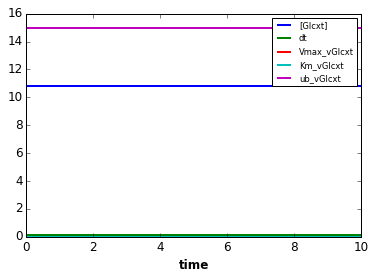

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [3]:
# load bounds model
r = te.loads(mbounds)
r.timeCourseSelections += r.getGlobalParameterIds()
s = r.simulate(0, 10, steps=200)
r.plot()

In [4]:
# diauxic update with Michaelis-Menten Protection against negative concentrations
r = te.loads(mupdate)
r.timeCourseSelections += r.getGlobalParameterIds()
r.timeCourseSelections += r.getReactionIds()
s = r.simulate(0, 15, steps=400)

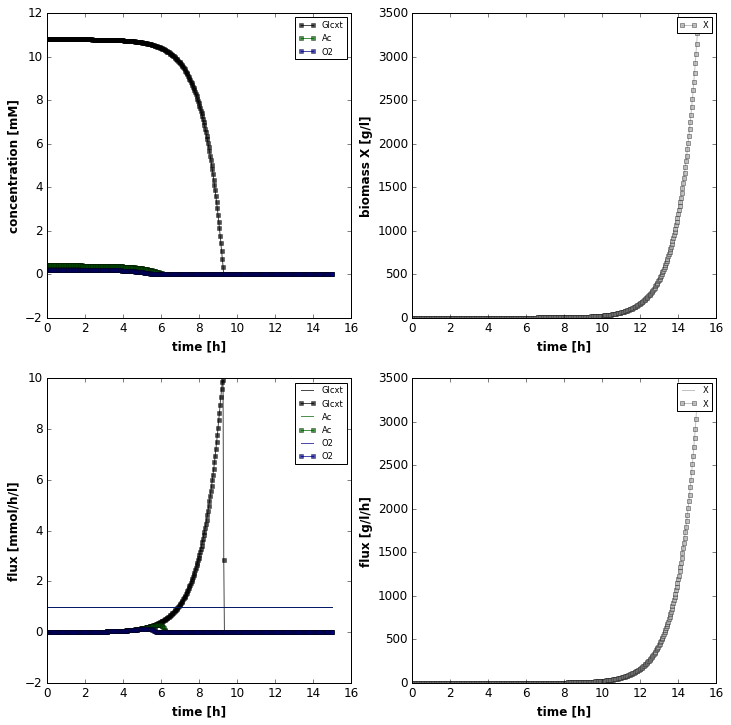

In [5]:
colors = {'Glcxt': 'black', 'Ac': 'darkgreen', 'O2': 'darkblue', 'X': 'darkgrey'}

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))


for substance in ['Glcxt', 'Ac', 'O2']:
    ax1.plot(s['time'], s['[{}]'.format(substance)], linestyle='-', marker='s', 
             markersize=4,
             color=colors[substance], alpha=0.7, label=substance)
    ax3.plot(s['time'], s['v{}'.format(substance)], linestyle='-', marker=None, 
             markersize=4,
             color=colors[substance], alpha=0.7, label=substance)
    ax3.plot(s['time'], s['update_{}'.format(substance)], linestyle='-', marker='s', 
             markersize=4,
             color=colors[substance], alpha=0.7, label=substance)
ax1.set_ylabel('concentration [mM]')
ax3.set_ylabel('flux [mmol/h/l]')

substance = 'X'
ax2.plot(s['time'], s['[{}]'.format(substance)], linestyle='-', marker='s', 
             markersize=4,
             color=colors[substance], alpha=0.7, label=substance)
ax2.set_ylabel('biomass X [g/l]')
# FBA flux
ax4.plot(s['time'], s['v{}'.format(substance)], linestyle='-', marker='None', 
             markersize=4,
             color=colors[substance], alpha=0.7, label=substance)
# concentration flux
ax4.plot(s['time'], s['update_{}'.format(substance)], linestyle='-', marker='s', 
             markersize=4,
             color=colors[substance], alpha=0.7, label=substance)
ax4.set_ylabel('flux [g/l/h]')

      
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel('time [h]')
    ax.legend()
plt.show()